In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

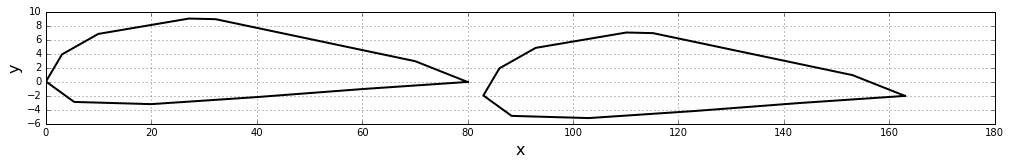

In [2]:
# reads of the geometry from a data file
with open ('naca4415-il2 3.csv') as file_name:
    x_ends, y_ends = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)
    

with open ('naca4415-il2 3.csv') as file_name:
    xf, yf = numpy.loadtxt(file_name, dtype=float, delimiter=',', unpack=True)
    xf = xf + 83
    yf = yf - 2
    
# plots the geometry
%matplotlib inline
#size = 1
pyplot.figure(figsize=(17,2))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, xf, yf, color='k', linestyle='-', linewidth=2);

In [3]:
class Panel:
    """Contains information related to a panel."""
    def __init__(self, xa, ya, xb, yb):
        """Initializes the panel.
        
        Arguments
        ---------
        xa, ya -- coordinates of the first end-point of the panel.
        xb, yb -- coordinates of the second end-point of the panel.
        """
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2            # collocation point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.n = [ math.cos(self.beta), math.sin(self.beta)]
        self.t = [-math.sin(self.beta), math.cos(self.beta)]
        
        self.kappa = 1                              # doublet strength
        self.vt = 0                                 # tangential velocity
        self.cp = 0                                 # pressure coefficient

In [4]:

# plot NACA 2510 airfoil
N_panels = 11                  # number of panels desired

"""
T  = 0.1
c = 1
H = 0.02

a = c/4
r = (0.25+T/(3*math.sqrt(3)))                      # circle radius
zeta_c = -4*a/(3*math.sqrt(3))*T + 1j*2*a*H        # circle center
theta = numpy.linspace(0, 2*math.pi, N_panels+1)   # theta endpoints of panels
zeta = r*numpy.exp(1j*theta)                       # endpoints of circle surface panels
z_ends = (zeta+zeta_c) + a**2/(zeta+zeta_c)        # endpoints of airfoil surface panels
x_ends,  y_ends = z_ends.real, z_ends.imag
"""
#x_ends = numpy.delete(x_ends,[1,N_panels-1])       # delete 2nd and 2nd to last points to merge panels
#y_ends = numpy.delete(y_ends,[1,N_panels-1])
#N_panels = N_panels - 2
# define the panels
panels = numpy.empty(N_panels+1, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
panels[-1] = Panel(x_ends[0], y_ends[0], x_ends[0]+1000, y_ends[0])


In [5]:

Nfpanels = 11                 # number of panels desired

"""
Tf  = 0.1
cf = 1
Hf = 0.02

af = cf/4
rf = (0.25+Tf/(3*math.sqrt(3)))                      # circle radius
zeta_cf = -4*af/(3*math.sqrt(3))*Tf + 1j*2*Hf*af        # circle center
thetaf = numpy.linspace(0, 2*math.pi, Nfpanels+1)   # theta endpoints of panels
zetaf = rf*numpy.exp(1j*thetaf)                       # endpoints of circle surface panels
z_endsf = (zetaf+zeta_cf) + af**2/(zetaf+zeta_cf)        # endpoints of airfoil surface panels
xfends,  yfends = z_endsf.real, z_endsf.imag

xf = xfends + 1.08
yf = yfends - 0.1
"""

#xf = numpy.delete(xf,[1,Nfpanels-1])       # delete 2nd and 2nd to last points to merge panels
#yf = numpy.delete(yf,[1,Nfpanels-1])
#Nfpanels = Nfpanels - 2

# define the panels
panelsf = numpy.empty(Nfpanels+1, dtype=object)
for i in range(Nfpanels):
    panelsf[i] = Panel(xf[i], yf[i], xf[i+1], yf[i+1])
panelsf[-1] = Panel(xf[0], yf[0], xf[0]+1000, yf[0])


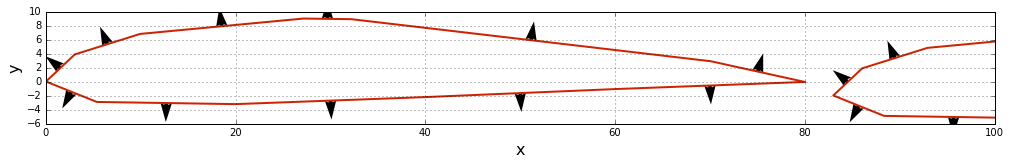

In [6]:


# plot the panels
#size = 6
pyplot.figure(figsize=(17,2))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
#pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
#pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels], [p.n[1] for p in panels],
              scale=50, width=0.005)

pyplot.plot(xf, yf, color='#CD2305', linestyle='-', linewidth=2)
#pyplot.scatter([p.xa for p in panelsf], [p.ya for p in panelsf], color='#CD2305', s=40)#pyplot.scatter([p.xc for p in panelsf], [p.yc for p in panelsf], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panelsf], [p.yc for p in panelsf], [p.n[0] for p in panelsf], [p.n[1] for p in panelsf],
              scale=50, width=0.005)

pyplot.xlim(0,100)
pyplot.ylim(-6,10);



In [7]:
Uinf = 1.0                         # free-stream velocity
alpha = 2.0*math.pi/180            # angle of attack

In [8]:
def get_doublet_panel_velocity(p,x,y):
    """Evaluates the velocity components induced at coordinates (x,y) by a panel p.
    
    Arguments
    ---------
    p -- panel from which the velocity is induced
    x -- x-coordinate in global frame
    y -- y-coordinate in global frame
    
    Returns
    -------
    (u,v)-components of velocity at (x,y)
    """
    
    x_p =  math.sin(p.beta)*(x-p.xb) - math.cos(p.beta)*(y-p.yb)
    y_p =  math.cos(p.beta)*(x-p.xb) + math.sin(p.beta)*(y-p.yb)
    
    u_p = -p.kappa/(2*math.pi)*(y_p/(x_p**2+y_p**2) - y_p/((x_p-p.length)**2+y_p**2))
    v_p =  p.kappa/(2*math.pi)*(x_p/(x_p**2+y_p**2) - (x_p-p.length)/((x_p-p.length)**2+y_p**2))
    
    u =  math.sin(p.beta)*u_p + math.cos(p.beta)*v_p
    v = -math.cos(p.beta)*u_p + math.sin(p.beta)*v_p
    
    return u, v

In [9]:
Nt = numpy.concatenate((panels,panelsf))
No = 2*(N_panels+1)
#No = N_panels+1

In [10]:
# compute the influence coefficient matrix
A = numpy.zeros((No, No), dtype=float)
for i, p_i in enumerate(Nt[0:No]):
    for j, p_j in enumerate(Nt):
        A[i,j] = numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.n)
        if i == j:
            A[i,j] *= 1.001
    
A[-1,:] = 0
A[-1,N_panels+1] = -1
A[-1,-2] = 1
A[-1,-1] = -1
A[N_panels,:] = 0
A[N_panels,0] = -1
A[N_panels,N_panels-1] = 1
A[N_panels,N_panels] = -1

# compute the RHS of the linear system
b = numpy.zeros((No, 1), dtype=float)
for i, p_i in enumerate(Nt[0:No]):
    b[i] = -numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.n)
        
b[N_panels,:] = 0
b[-1,:] = 0

print (A)
print (b)

[[  6.14980249e-02  -2.70843086e-02  -3.81297995e-04  -8.69333680e-04
   -2.46402495e-04  -1.17438178e-04   1.19289845e-04   5.41741768e-04
    1.48940971e-03   5.20176111e-03  -4.00900098e-02   3.05665192e-02
   -2.06404607e-04  -1.61556034e-03  -4.59600327e-04  -3.72465876e-03
   -5.89416944e-03  -4.58521163e-03   7.58077447e-03   5.12845310e-03
    2.28157744e-03   9.68023719e-04   5.26776377e-04   1.61079911e-03]
 [ -2.90634811e-03   1.66152267e-02  -1.72333414e-03  -2.75031088e-03
   -5.85059181e-04  -2.63437821e-04   2.30946341e-04   1.22011762e-03
    3.68805807e-03  -2.04000954e-02   6.89083548e-03   5.24006038e-03
   -1.36382592e-04  -8.96590228e-04  -2.08065189e-04  -1.11929231e-03
   -7.50566432e-04  -3.04288280e-04   7.56812632e-04   1.07671634e-03
    8.02969556e-04   4.71399055e-04   3.07287439e-04   1.27230547e-03]
 [ -7.89212957e-04  -5.91148399e-02   1.26079321e-01  -5.50272936e-02
   -2.20335945e-03  -8.59625204e-04   3.46278098e-04   9.58844722e-04
   -1.34001558e-02

In [11]:
# solves the linear system
kappa = numpy.linalg.solve(A, b)
print (kappa)
km = kappa [:N_panels+1]
for i, panel in enumerate(panels):
    panel.kappa = float(km[i])
    
kf = kappa [Nfpanels:]
for i, panel in enumerate(panelsf):
    panel.kappa = float(kf[i])
print (km)
print (kf)

[[-1517.67337699]
 [-1512.91773068]
 [-1492.19440459]
 [-1475.60758321]
 [-1458.46457569]
 [-1448.00422921]
 [-1445.63781093]
 [-1454.42543278]
 [-1467.19680824]
 [-1477.67082186]
 [-1478.85202947]
 [   38.82134752]
 [-1357.03397905]
 [-1351.65440459]
 [-1333.00572869]
 [-1318.30155091]
 [-1304.83361282]
 [-1298.40042671]
 [-1301.79089022]
 [-1313.5318367 ]
 [-1328.2599788 ]
 [-1339.98093411]
 [-1342.55342393]
 [   14.48055513]]
[[-1517.67337699]
 [-1512.91773068]
 [-1492.19440459]
 [-1475.60758321]
 [-1458.46457569]
 [-1448.00422921]
 [-1445.63781093]
 [-1454.42543278]
 [-1467.19680824]
 [-1477.67082186]
 [-1478.85202947]
 [   38.82134752]]
[[   38.82134752]
 [-1357.03397905]
 [-1351.65440459]
 [-1333.00572869]
 [-1318.30155091]
 [-1304.83361282]
 [-1298.40042671]
 [-1301.79089022]
 [-1313.5318367 ]
 [-1328.2599788 ]
 [-1339.98093411]
 [-1342.55342393]
 [   14.48055513]]


In [12]:
for i, p_i in enumerate(panels[0:N_panels]):
    vt = numpy.array([0])
    for j, p_j in enumerate(panels):
        if i != j:
            vt = vt + numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.t)
    if i == 0:
        R = math.sqrt((panels[1].xc-panels[0].xc)**2 + (panels[1].yc-panels[0].yc)**2)
        vt = vt - 0.5*(panels[1].kappa-panels[0].kappa)/R
    elif i == N_panels-1:
        R = math.sqrt((panels[N_panels-1].xc-panels[N_panels-2].xc)**2 + (panels[N_panels-1].yc-panels[N_panels-2].yc)**2)
        vt = vt - 0.5*(panels[N_panels-1].kappa-panels[N_panels-2].kappa)/R
    else:
        R = math.sqrt((panels[i+1].xc-panels[i-1].xc)**2 + (panels[i+1].yc-panels[i-1].yc)**2)
        vt = vt - 0.5*(panels[i+1].kappa-panels[i-1].kappa)/R
    vt = vt + numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.t)
    p_i.vt = float(vt)
    p_i.cp = 1.0 - (p_i.vt/Uinf)**2
    
    print (vt)

[-1.0349638]
[-1.14931266]
[-1.39786115]
[-1.4846751]
[-1.49690639]
[-1.34186239]
[ 0.50682357]
[ 0.88442351]
[ 0.75012044]
[ 0.97691665]
[ 0.76050628]


In [15]:

for i, p_i in enumerate(panelsf[0:Nfpanels]):
    vt1 = numpy.array([0])
    for j, p_j in enumerate(panels):
        if i != j:
            vt1 = vt1 + numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.t)
    if i == 0:
        R = math.sqrt((panelsf[1].xc-panelsf[0].xc)**2 + (panelsf[1].yc-panelsf[0].yc)**2)
        vt1 = vt1 - 0.5*(panelsf[1].kappa-panelsf[0].kappa)/R
    elif i == Nfpanels-1:
        R = math.sqrt((panelsf[Nfpanels-1].xc-panelsf[Nfpanels-2].xc)**2 + (panelsf[N_panels-1].yc-panelsf[Nfpanels-2].yc)**2)
        vt1 = vt1 - 0.5*(panelsf[Nfpanels-1].kappa-panelsf[Nfpanels-2].kappa)/R
    else:
        R = math.sqrt((panelsf[i+1].xc-panelsf[i-1].xc)**2 + (panelsf[i+1].yc-panelsf[i-1].yc)**2)
        vt1 = vt1 - 0.5*(panelsf[i+1].kappa-panelsf[i-1].kappa)/R
    vt1 = vt1 + numpy.dot(numpy.array([Uinf*math.cos(alpha), Uinf*math.sin(alpha)]), p_i.t)
    p_i.vt = float(vt1)
    p_i.cp = 1.0 - (p_i.vt/Uinf)**2



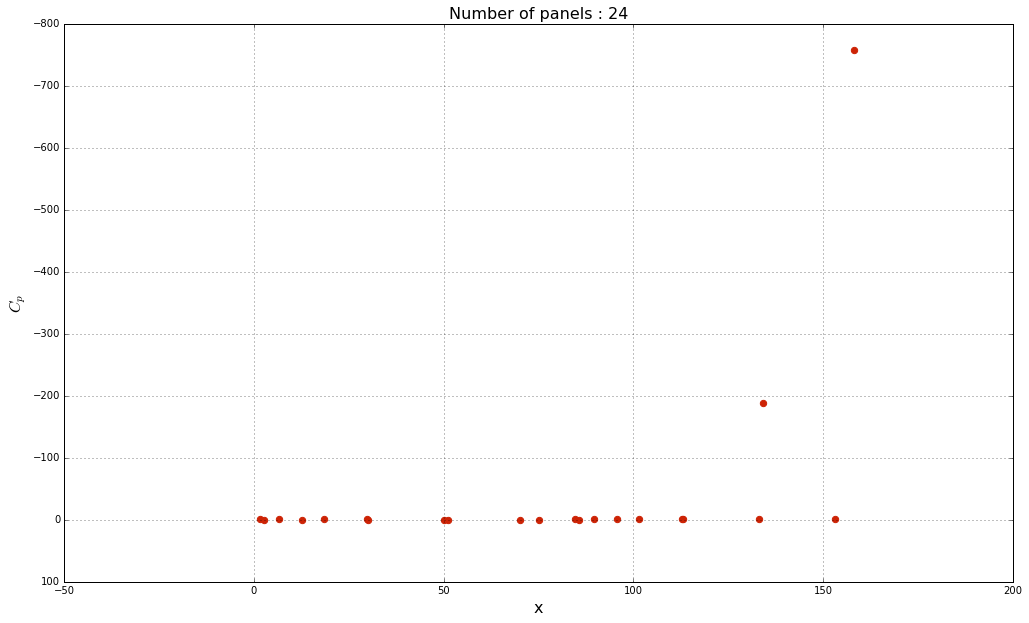

In [17]:
# plots the surface pressure coefficient
pyplot.figure(figsize=(17,10))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.scatter([p.xc for p in panels[0:N_panels]], [p.cp for p in panels[0:N_panels]], color='#CD2305', s=40, zorder=2)
pyplot.scatter([p.xc for p in panelsf[0:Nfpanels]], [p.cp for p in panelsf[0:Nfpanels]], color='#CD2305', s=40, zorder=2)

pyplot.title('Number of panels : %d' % No, fontsize=16)
#pyplot.xlim(-0.6, 0.6)
#pyplot.ylim(-1, 1.5)
pyplot.gca().invert_yaxis();